In [1]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
from scipy.stats import binom

#Borrowed from: https://gist.github.com/GrantMoyer/6c44275c3ae13a2334cda22fdda2ae31

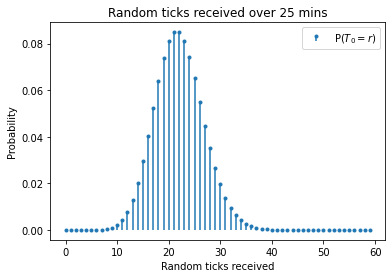

In [2]:
random_tick_speed = 3
total_time_gt = 20*60*25

def first_check():
    T_0_dist = binom(random_tick_speed * total_time_gt, 16**-3)
    random_ticks = np.arange(0, 60)
    T_0 = T_0_dist.pmf(random_ticks)
    plt.stem(random_ticks, T_0, markerfmt='.', basefmt=' ')
    plt.legend([r'P$(T_0 = r)$'])
    plt.xlabel("Random ticks received")
    plt.ylabel("Probability")
    plt.title("Random ticks received over 25 mins")
    plt.show()

    return T_0, random_ticks

T_0, random_ticks = first_check()


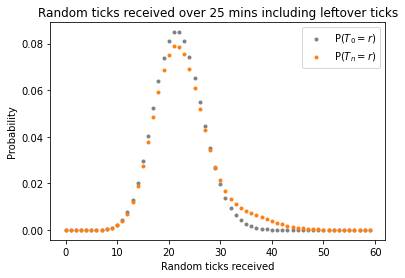

In [3]:
def compute_T_n(T_0):
    T_prev = np.zeros_like(T_0)
    T_n = T_0
    while np.linalg.norm(T_n - T_prev) > 0.000001:
        T_prev = T_n
        T_n_prime = T_n.copy()
        T_n_prime[16:] = 0
        T_n_prime[0] += T_n[16:].sum()
        T_n = np.convolve(T_0, T_n_prime, mode='full')[:len(T_0)]
        T_n /= T_n.sum() # renormalize to counteract error
    return T_n
T_n = compute_T_n(T_0)
plt.scatter(random_ticks, T_0, c='grey', marker='.')
plt.scatter(random_ticks, T_n, c='C1', marker='.')
plt.legend([r'P$(T_0 = r)$', r'P$(T_n = r)$'])
plt.xlabel("Random ticks received")
plt.ylabel("Probability")
plt.title("Random ticks received over 25 mins including leftover ticks")
plt.show()

1.0 0.053204120371120274 3.1922472222672162
1.0166666666666666 0.054071230144206624 3.1910889921171126
1.0333333333333332 0.05489435052959939 3.1874139017186742
1.0499999999999998 0.055759971403972895 3.186284080227023
1.0666666666666664 0.05662480750759596 3.185145422302273
1.083333333333333 0.05748884302138488 3.183997459645932
1.0999999999999996 0.058352067241589485 3.1828400313594276
1.1166666666666663 0.05921449714733065 3.181674473587917
1.1333333333333329 0.06007614719944164 3.1805019105586765
1.1499999999999995 0.060937028904172096 3.1793232471741977
1.166666666666666 0.061797425328674646 3.1781533026175546
1.1833333333333327 0.06265681825234885 3.1769654325134646
1.1999999999999993 0.06351545747710205 3.1757728738551045
1.216666666666666 0.06437301365714268 3.1745595776125177
1.2333333333333325 0.06523014474004896 3.1733583927591407
1.2499999999999991 0.06608653485991134 3.1721536732757465
1.2666666666666657 0.06694218612212453 3.1709456584164277
1.2833333333333323 0.067797100

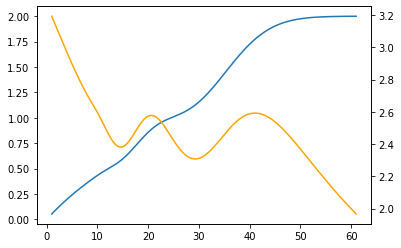

In [4]:
def compute_dist_given_time_gt(harvest_cycle_gt, harvest_overhead_gt):
    random_tick_speed = 3
    growth_time_per_cycle = harvest_cycle_gt - harvest_overhead_gt
    random_ticks = np.arange(0, 100)
    dist_t0 = binom(random_tick_speed * growth_time_per_cycle, 16**-3).pmf(random_ticks)
    dist_t1 = compute_T_n(dist_t0)

    expected_collection = dist_t1[16:32].sum() * 1 + dist_t1[32:].sum() * 2
    return expected_collection

minutes = np.arange(1, 61, (1/60))
collected = np.zeros(minutes.shape[0])
rates = np.zeros(minutes.shape[0])

for i, duration in enumerate(minutes):
    avg_collected = compute_dist_given_time_gt(int(duration*60*20), 6)
    collected[i] = avg_collected
    rates[i] = avg_collected / duration * 60
    print(duration, avg_collected, avg_collected / duration * 60)


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

#print(collected, rates)

ax1.plot(minutes, collected)
ax2.plot(minutes, rates, color='orange')
plt.show()

    

    